In [21]:
#!pip install seaborn numpy matplotlib phonopy phono3py pyyaml
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn
import yaml as yaml

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k", "axes.linewidth":2.})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0.1,
                            "font.family":"Helvetica", "axes.labelsize":20.,"xtick.labelsize":18.,
                            "ytick.labelsize":18., "legend.fontsize":16.,"title.labelsize":18.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("colorblind", 8) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)
# color key: main element = 'k', additional elements = colors[0,1,2,...], fermi = colors[6], kpoints = colors[7]
# have dft='k' 'solid'; gfn1=colors[10] 'dotted'; gfn2=colors[11] 'dashed'

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

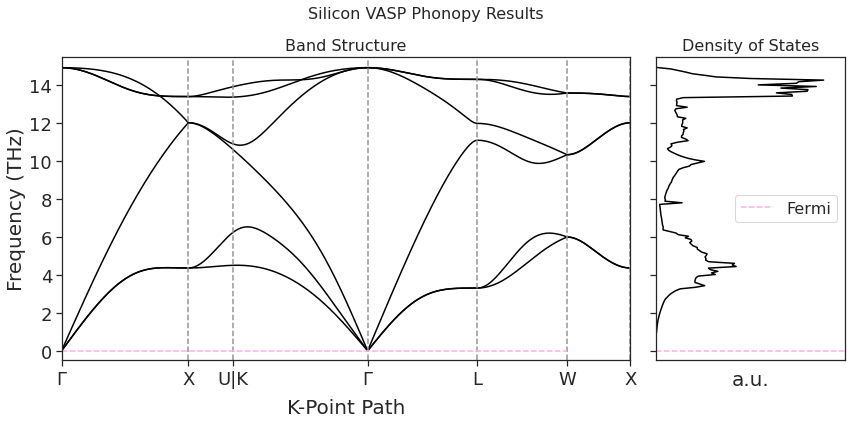

In [24]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Silicon VASP Phonopy Results',fontsize=16)
plt.subplot(121)
dos = np.array(np.loadtxt('./total_dos.dat'))
bands = np.array(np.loadtxt('./band.dat'))
fermi = 0

# $\Gamma$ X U,K $\Gamma$ L W X
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
plt.vlines(kpath,-0.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,bands[605,0])
plt.ylim(-0.5,15.5)
plt.xlabel('K-Point Path',  labelpad = 10)
plt.ylabel('Frequency (THz)', labelpad = 3)
plt.title('Band Structure',fontsize=16)

plt.subplot(122) # not sure how to make less wide
plt.plot(dos[:,1], dos[:,0], color='black')
plt.hlines(0,0,25,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([ ])
plt.xlabel('a.u.',  labelpad = 10)
plt.xlim(0,10)
plt.ylim(-0.5,15.5)
plt.title('Density of States',fontsize=16)
plt.legend(loc='center right')

plt.savefig('./Si_VASP_Phonopy_Results.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #